In [48]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"

In [50]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [51]:
Jennifertweets = get_all_tweets("@JRubinBlogger")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1200 tweets downloaded so far
...1400 tweets downloaded so far
...1600 tweets downloaded so far
...1800 tweets downloaded so far
...2000 tweets downloaded so far
...2200 tweets downloaded so far
...2400 tweets downloaded so far
...2600 tweets downloaded so far
...2800 tweets downloaded so far
...3000 tweets downloaded so far
...3200 tweets downloaded so far
...3250 tweets downloaded so far
...3250 tweets downloaded so far


In [52]:
#overview of jennifer tweets
Jennifertweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-02 12:05:04+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],[],393,en,1052,667468,65,False,"Biden shows true affection for the media as an institution, perhaps because he understands — better than click-focu… https://t.co/vOM1WrHNBS",Washington DC
1,2022-05-02 12:02:14+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],[],231,en,1052,667468,59,False,Refusing to call out Republicans’ habitual lies as more than “just politics” and the media’s obsessions with horse-… https://t.co/wJ9FFv3vuo,Washington DC
2,2022-05-02 12:01:16+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],[],134,en,1052,667468,30,False,The too-common pose of “neutrality” when one political party is injecting that “poison” running through our democra… https://t.co/fWs7XReMRd,Washington DC
3,2022-05-02 00:34:44+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],"[{'screen_name': 'tribelaw', 'name': 'Laurence Tribe', 'id': 4091551984, 'id_str': '4091551984', 'indices': [0, 9]}]",906,en,1052,667468,104,False,"@tribelaw But really, what's 124 years of precedent to this Supreme Court?",Washington DC
4,2022-05-02 00:17:28+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],[],787,en,1052,667468,148,False,the anti-immigration right must think Russia is getting the better of the deal: its population is dropping and the… https://t.co/8TwfDwbFIe,Washington DC


In [53]:
Jennifertweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250,3250
unique,3250,1,1,1,17,1072,1245,12,1,1,685,1,3250,1
top,2022-02-25 22:50:55+00:00,Jennifer 'I stand with Ukraine' Rubin 🇺🇦🇺🇦,117983,"NeverTrump, pro-democracy opinion writer at @WashingtonPost, MSNBC contributor. “But at any rate, I came for ice cream.""",[],[],0,en,1052,667468,0,False,The vivid text messages recall how they have chosen to ignore or forget the peril Trump created for THEM and our de… https://t.co/kJARwpWpSy,Washington DC
freq,1,3250,3250,3250,3234,1745,415,3138,3250,3250,124,3250,1,3250


In [54]:
Jennifertweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3250 non-null   object
 1   name             3250 non-null   object
 2   totaltweets      3250 non-null   object
 3   description      3250 non-null   object
 4   hashtags         3250 non-null   object
 5   user_mentions    3250 non-null   object
 6   favorite_count   3250 non-null   object
 7   lang             3250 non-null   object
 8   following        3250 non-null   object
 9   followers_count  3250 non-null   object
 10  retweet_count    3250 non-null   object
 11  retweeted        3250 non-null   object
 12  text             3250 non-null   object
 13  location         3250 non-null   object
dtypes: object(14)
memory usage: 355.6+ KB


In [55]:
#jennifer is retweeting more than using the same hashtag
Jennifertweets['hashtags'].value_counts().loc[lambda x : x>0].to_frame()

,hashtags
[],3234
"[{'text': 'StandWithLiz', 'indices': [21, 34]}, {'text': 'SaveOurDemocracy', 'indices': [45, 62]}]",1
"[{'text': 'RBG', 'indices': [54, 58]}]",1
"[{'text': 'inners', 'indices': [117, 124]}]",1
"[{'text': 'SCOTUS', 'indices': [51, 58]}, {'text': 'KetanjiBrownJackson', 'indices': [91, 111]}]",1
"[{'text': 'PASen', 'indices': [124, 130]}]",1
"[{'text': 'racist', 'indices': [124, 131]}]",1
"[{'text': 'Mississippi', 'indices': [35, 47]}]",1
"[{'text': 'AmericanVoices', 'indices': [39, 54]}]",1
"[{'text': 'sistersinlaw', 'indices': [0, 13]}]",1


In [56]:
#display the most user mentions
Jennifertweets['user_mentions'].value_counts().loc[lambda x : x>10].to_frame()

,user_mentions
[],1745
"[{'screen_name': 'pbump', 'name': 'Philip Bump', 'id': 950531, 'id_str': '950531', 'indices': [0, 6]}]",16
"[{'screen_name': 'RadioFreeTom', 'name': 'Tom Nichols', 'id': 459872442, 'id_str': '459872442', 'indices': [0, 13]}]",15
"[{'screen_name': 'MollyJongFast', 'name': 'Molly Jong-Fast', 'id': 14298769, 'id_str': '14298769', 'indices': [0, 14]}]",14
"[{'screen_name': 'BillKristol', 'name': 'Bill Kristol', 'id': 2800581040, 'id_str': '2800581040', 'indices': [0, 12]}]",13
"[{'screen_name': 'harrylitman', 'name': 'Harry Litman', 'id': 817787882395955200, 'id_str': '817787882395955200', 'indices': [0, 12]}]",12
"[{'screen_name': 'mkraju', 'name': 'Manu Raju', 'id': 39155029, 'id_str': '39155029', 'indices': [0, 7]}]",12
"[{'screen_name': 'NormOrnstein', 'name': 'Norman Ornstein', 'id': 2223157392, 'id_str': '2223157392', 'indices': [0, 13]}]",11
"[{'screen_name': 'SykesCharlie', 'name': 'Charlie Sykes', 'id': 95463107, 'id_str': '95463107', 'indices': [0, 13]}]",11
"[{'screen_name': 'atrupar', 'name': 'Aaron Rupar', 'id': 288277167, 'id_str': '288277167', 'indices': [0, 8]}]",11


In [85]:
#which tweet got the most like
print(Jennifertweets['favorite_count'].max())
Jennifertweets.loc[Jennifertweets['favorite_count'] == Jennifertweets['favorite_count'].max()]['text']

75711


789    We have the poorest quality senators in history. No contest.
Name: text, dtype: object

In [86]:
#which tweet got the most like
print(Jennifertweets['retweet_count'].max())
Jennifertweets.loc[Jennifertweets['retweet_count'] == Jennifertweets['retweet_count'].max()]['text']

31070


657    RT @DocRah_Peds: My great-grandmother only had a 3rd grade education.\n\nMy grandmother died at the age of 39 after having a massive heart at…
Name: text, dtype: object

In [59]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [60]:
Jennifertweets = get_sentiment_scores(Jennifertweets,'text')
tweet_sentiment = Jennifertweets[['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [61]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,"Biden shows true affection for the media as an institution, perhaps because he understands — better than click-focu… https://t.co/vOM1WrHNBS",0.378,0.000
1,Refusing to call out Republicans’ habitual lies as more than “just politics” and the media’s obsessions with horse-… https://t.co/wJ9FFv3vuo,0.000,0.316
2,The too-common pose of “neutrality” when one political party is injecting that “poison” running through our democra… https://t.co/fWs7XReMRd,0.137,0.000
3,"@tribelaw But really, what's 124 years of precedent to this Supreme Court?",0.348,0.000
4,the anti-immigration right must think Russia is getting the better of the deal: its population is dropping and the… https://t.co/8TwfDwbFIe,0.132,0.000


In [62]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.901, Tweet: @nprpolitics WOW. Thank God,
Score: 0.827, Tweet: Please join! https://t.co/GxHXKZUpJ4
Score: 0.827, Tweet: PLease join! https://t.co/oiAy5gUDZU
Score: 0.827, Tweet: please join! https://t.co/VewecBBYHN
Score: 0.818, Tweet: please join https://t.co/7NN9zwRm02
Score: 0.808, Tweet: Best part
Score: 0.799, Tweet: Fabulous!! https://t.co/Gx4thz7KBr
Score: 0.792, Tweet: @petridishes brilliant
Score: 0.788, Tweet: YES! https://t.co/nX0TsFOdPp
Score: 0.788, Tweet: @amandacarpenter YES!


In [63]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.897, Tweet: @NormOrnstein Weak, weak, weak
Score: 0.881, Tweet: @John_Hudson War crime.
Score: 0.872, Tweet: @ThirdWayMattB stupid. stupid.
Score: 0.851, Tweet: @EliStokols gravely disappointing
Score: 0.818, Tweet: childish, jealousy. https://t.co/yIQn9C0lKd
Score: 0.787, Tweet: @BillKristol Pathetic
Score: 0.778, Tweet: @marceelias @nytimes Horrid. Horrid.
Score: 0.767, Tweet: @UrbanAchievr sick.
Score: 0.762, Tweet: @CREWcrew shameful
Score: 0.75, Tweet: @NormOrnstein awful.


In [64]:
Jennifertweets['retweet_count']= Jennifertweets['retweet_count'].astype('int64')
Jennifertweets['favorite_count']= Jennifertweets['favorite_count'].astype('int64')

In [65]:
features= Jennifertweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,0.415114,-0.035056,0.005189
favorite_count,0.415114,1.000000,-0.007278,0.034666
text Positive Sentiment Score,-0.035056,-0.007278,1.000000,-0.246076
text Negative Sentiment Score,0.005189,0.034666,-0.246076,1.000000


<AxesSubplot:>

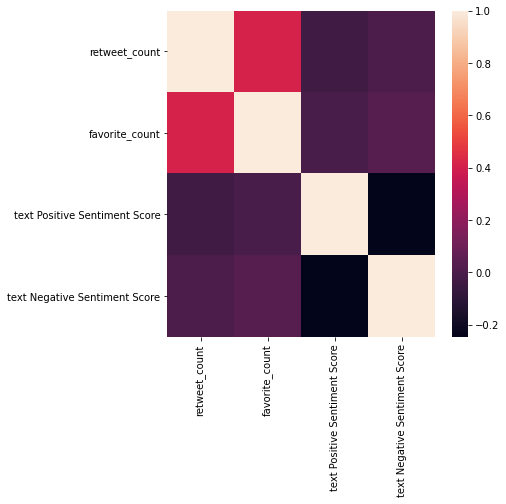

In [66]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [67]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [68]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [69]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-69-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-2ade89c

In [70]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-70-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    biden show true affection medium institution, perhaps understands — better click-focu…
1         refusing call republicans’ habitual lie “just politics” media’s obsession horse-…
2        too-common pose “neutrality” one political pay injecting “poison” running democra…
3                                             really, whats 124 year precedent supreme cou?
4           anti-immigration right must think getting better deal: population dropping the…
Name: clean_lemmatized, dtype: object

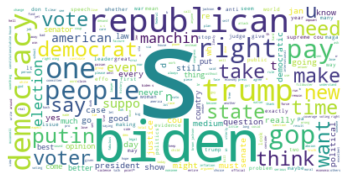

In [71]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

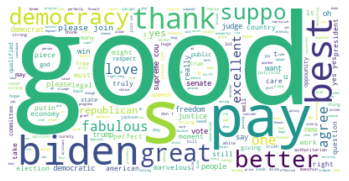

In [72]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

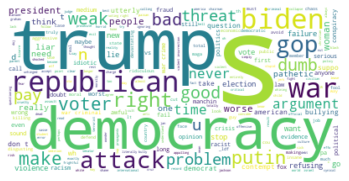

In [73]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [74]:
#retweets distribution over time
fig = px.line(Jennifertweets, x="time", y= Jennifertweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [75]:
df=Jennifertweets[['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=Jennifertweets[['time', 'retweet_count','text Positive Sentiment Score']]
neg =Jennifertweets[['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
516,2022-03-31 21:47:52+00:00,12,0.464,0.000
517,2022-03-31 21:47:24+00:00,486,0.198,0.131
518,2022-03-31 20:33:23+00:00,29,0.000,0.000
519,2022-03-31 20:13:06+00:00,0,0.000,0.000
520,2022-03-31 19:31:43+00:00,1,0.785,0.000
...,...,...,...,...
1260,2022-03-01 03:03:49+00:00,5,0.574,0.000
1261,2022-03-01 03:01:51+00:00,8,0.000,0.000
1262,2022-03-01 03:00:01+00:00,3,0.000,0.000
1263,2022-03-01 02:07:36+00:00,360,0.000,0.076


In [76]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [77]:

Jennifertweets ["is_viral"] = Jennifertweets .retweet_count.apply(
    lambda row: 1 if row >= Jennifertweets .retweet_count.mean()  else 0)

print(Jennifertweets .is_viral.value_counts())

0    2744
1     506
Name: is_viral, dtype: int64


In [78]:
Jennifertweets ['tweet_length'] = Jennifertweets .apply(lambda tweet: len(tweet['text']), axis=1)
Jennifertweets ["followers_count"] = Jennifertweets .apply(lambda tweet: tweet["followers_count"], axis=1)
Jennifertweets ["friends_count"] = Jennifertweets .apply(lambda tweet: tweet["following"], axis=1)

Jennifertweets ["hashtag_count"] = Jennifertweets .apply(lambda tweet: tweet.text.count("#"), axis=1)
Jennifertweets ["link_count"] = Jennifertweets .apply(lambda tweet: tweet.text.count("http"), axis=1)
Jennifertweets ["word_count"] = Jennifertweets .apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

Jennifertweets ["avg_length_of_words"] = Jennifertweets .text.apply(find_avg_word_length)

In [79]:


labels = Jennifertweets [["is_viral"]]
features = Jennifertweets [["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = Jennifertweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = Jennifertweets [["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                        140
followers_count                  667468
friends_count                      1052
text Positive Sentiment Score     0.378
text Negative Sentiment Score       0.0
Name: 0, dtype: object
[ 0.75612333  0.          0.          1.74163052 -0.75083878]


In [80]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1)

In [81]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)


C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9030769230769231

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

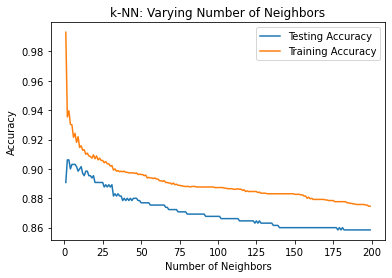

In [82]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [83]:
#lets find best_k

best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

2
0.9061538461538462


In [87]:
Jennifertweets.to_csv('jennifertweets')